# < 26. 활성화 함수의 이해 >

## 목차
1. 활성화 함수
    - 활성화 함수
    - 퍼셉트론
        - 신경세포의 구조
        - 퍼셉트론의 구조
2. 선형과 비선형
    - 선형
    - 비선형
    - 비선형 함수를 쓰는 이유
        - 그렇다면
3. 활성화 함수의 종류
    - 이진 계단 함수
        - 이진 계단 함수의 한계
    - 선형 활성화 함수
        - 선형 활성화 함수의 한계
    - 비선형 활성화 함수
        - 시그모이드/로지스틱
        - 하이퍼볼릭 탄젠트
        - ReLU
        - ReLU의 단점을 극복하기 위한 시도들


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from itertools import product
import tensorflow as tf

tf.random.set_seed(7879)

print('Ready to activate?⤴')

Ready to activate?⤴


---

## 26.2 활성화 함수


우리가 지금까지 써왔던 신경망 속의 퍼셉트론(perceptron) 혹은 노드(node)도 '특정 조건'이 만족하면 '활성화' 되도록 디자인되어 있습니다. 노드에 입력으로 들어오는 값이 어떤 '임계치'를 넘어가면 "활성화(activated)"되고, 넘어가지 않으면 "비활성화(deactivated)"되게끔 코딩이 되어있는 것이죠. 익숙하게 써오셨던 ReLU 함수는 이러한 관점에서 어떻게 작용하고 있을까요?

우리가 지금까지 써왔던 신경망 속의 퍼셉트론(perceptron) 혹은 노드(node)도 '특정 조건'이 만족하면 '활성화' 되도록 디자인되어 있습니다. 노드에 입력으로 들어오는 값이 어떤 '임계치'를 넘어가면 "활성화(activated)"되고, 넘어가지 않으면 "비활성화(deactivated)"되게끔 코딩이 되어있는 것이죠. 익숙하게 써오셨던 ReLU 함수는 이러한 관점에서 어떻게 작용하고 있을까요?

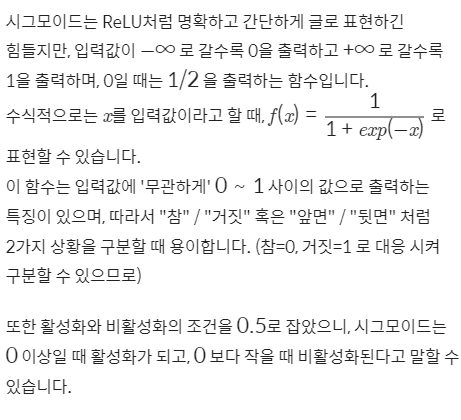

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-34-intro_sigmoid.max-800x600.png)

활성화 함수의 기본적 정의는 위와 같지만, 실제로 딥러닝에서 활성화 함수를 쓰는 결정적 이유는 따로 있습니다. 바로 딥러닝 모델의 <mark>표현력</mark>을 향상시켜주기 위해서인데요, 전문적인 용어로는 모델의 representation capacity 또는 expressivity를 향상시킨다라고도 말합니다.

---

## 26.3 퍼셉트론


### 퍼셉트론

우리가 알고 있는 딥러닝 모델은 보통 여러 개의 층으로 이루어져 있습니다. 그중에 하나의 층을 가져와 다시 쪼갠다면 보통 '노드'라고 불리는 것으로 쪼개지게 되는데, 이것이 바로 <mark>퍼셉트론(Perceptron)</mark>입니다. 반대로 퍼셉트론을 쌓으면 단층 퍼셉트론이 되고, 이 단층 퍼셉트론을 쌓으면 다층 퍼셉트론이 됩니다. 즉, 우리가 알고 있는 딥러닝 모델은 사실 퍼셉트론들이 다양한 구조로 쌓인 것이죠.

### 신경세포의 구조

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-34-neuron2.max-800x600.png)

- 가지돌기
    - 세포로 전달되는 신호를 받아들이는 부분
- 축삭돌기
    - 세포에서 다른 세포로 신호를 전달하는 부분
- 시냅스 
    - 가지돌기와 축삭돌기 사이에 있는 부분으로 신호 전달의 세기를 담당하며 시냅스의 발달 정도에 따라 같은 신호도 강하게 전달되거나 약하게 전달됩니다. 시냅스는 사용 빈도에 따라 커지거나 작아지며 심지어 시냅스 자체가 사라지기도 합니다.
- 세포체
    - 세포체는 각 가지돌기로부터 들어온 신호들로부터 자신의 출력 신호를 만들고 이를 다음 세포에 전송합니다. 이때의 출력 신호는 단순히 입력신호들의 합이 아닌 비선형 방식으로 결정됩니다. 즉, 합이 일정 수준 이하이면 비활성 상태가 되어 신호를 무시하고, 일정 수준을 넘게 되면 활성 상태가 되어 신호를 다음 세포로 전송합니다

### 퍼셉트론의 구조

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-perceptron.png)

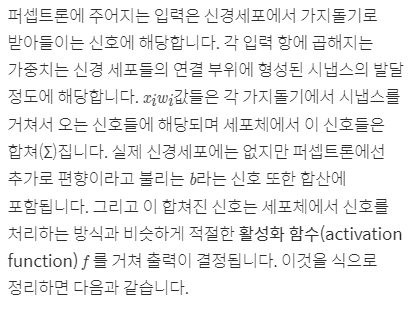

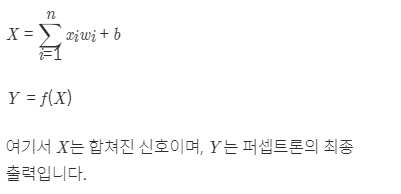

### 활성화 함수

앞서 확인할 수 있듯이 활성화 함수는 신경 세포로 치면 세포체에서 일어나는 일을 맡고 있습니다. 따라서 하는 일도 비슷합니다. 들어온 신호가 특정 임계점을 넘으면 출력을 하고, 넘지 못하면 무시를 합니다. 활성화 함수는 신호를 '전달' 해주기 때문에 Transfer function으로도 알려져 있습니다.

활성화 함수는 <br>
<mark>선형 활성화 함수</mark> <br>
<mark>비선형 활성화 함수</mark> 로 나눌 수 있다

---

## 26.4 선형과 비선형

### 선형
- 선형 변환이란 '선형'이라는 규칙을 지키며 V 공간상의 벡터를 W 공간상의 벡터로 바꿔주는 역할을 합니다.

![](https://d3s0tskafalll9.cloudfront.net/media/images/F-34-transformation.max-800x600.png)

#### 선형 변환 정의

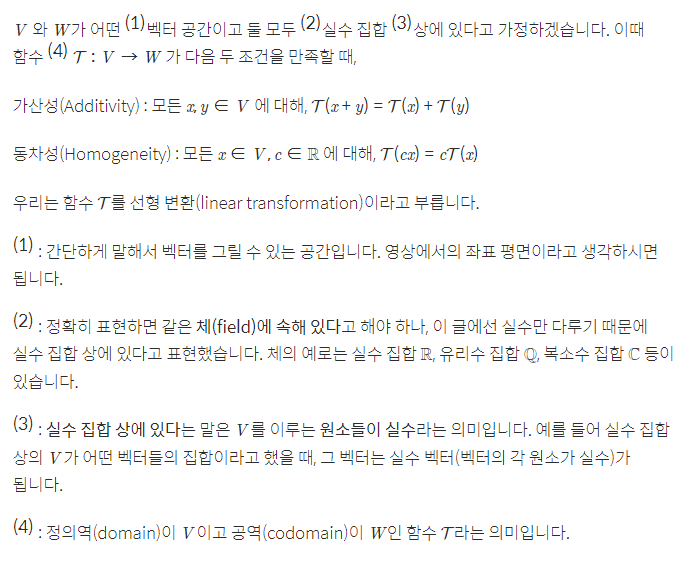

![](https://d3s0tskafalll9.cloudfront.net/media/original_images/F-34-transformation_as_set.png)

---

## 26.5 비선형 함수를 쓰는 이유(1)

### 비선형(Non-linear)
- 선형이 아닌 함수를 비선형 함수라고 한다

### 비선형 함수를 쓰는 이유

- 딥러닝 모델의 표현력을 향싱시키기 위해서 입니다.
    - 그럼 선형 활성화 함수를 사용하면 왜 표현력이 떨어지게 되는 걸까요?
    - 레이어를 충분히 쌓는다면 선형 활성화 함수를 사용한 모델의 표현력을 향상시킬 수 있지 않을까요?

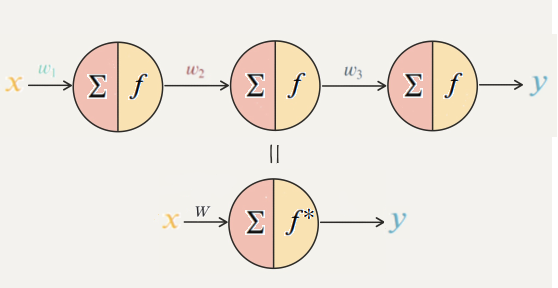

- 선형 함수를 쓸 경우  3개의 노드를 1개로 줄여서 표현을 해도 결과가 달라지지 않는다는 것입니다.

---

## 26.6 비선형 함수를 쓰는 이유(2)

선형 활성화 함수를 사용한다면, 모델의 표현력이 떨어지게 됩니다. 자, 그럼 단일 노드가 아닌 layer들로 구성되어 있는 모델에서도 위와 같을까요?

지금부터는 Layer들을 쌓아도 활성화 함수가 선형이라면 모델의 표현력은 증가하지 않는다는 것을 증명해 보겠습니다. 아래 그림은 input layer가 각각 1개, hidden layer는 2개(왼쪽 그림) or 1개(오른쪽)로 구성된 임의의 모델입니다. 빨간색으로 표현된 부분은 활성화 함수이며, 두 모델 모두 선형 활성화 함수라고 보겠습니다.

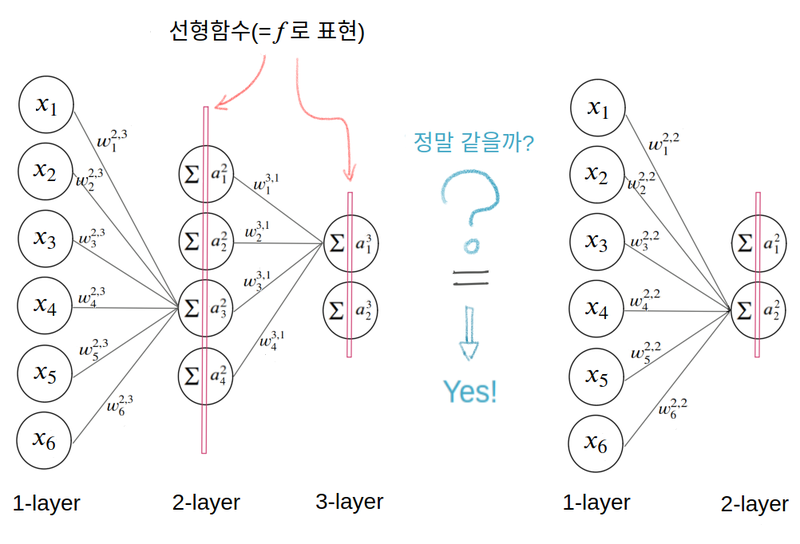

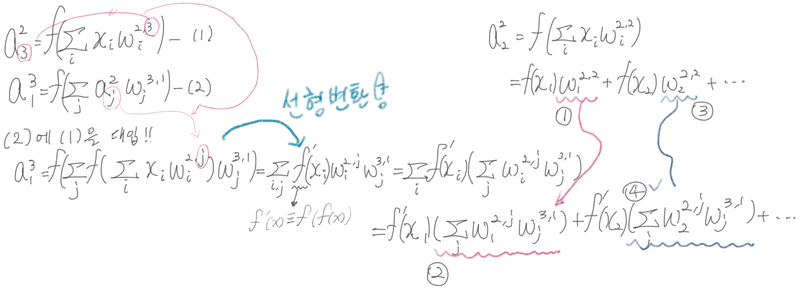

---

## 26.7 활성화 함수의 종류 (1) 이진 계단 함수
1. 이진 계단 함수
2. 선형 활성화 함수
3. 비선형 활성화 함수

### <mark>이진 계단 함수</mark>
- 이진 계단 함수(Binary step function) 라는 이름이 붙은 이유는 간단합니다. 이 함수로 들어온 입력이 특정 임계점을 넘으면 11(혹은 True)를 출력하고 그렇지 않을 때는 00을 출력하기 때문입니다. (그래프를 보면 더 명확히 알 수 있습니다.) 이러한 특성 때문에 이 활성화 함수는 간단한 이진 분류 문제에서 꽤 유용하게 쓰입니다. 아래의 식은 임계점이 00일 때의 이진 계단 함수식입니다.

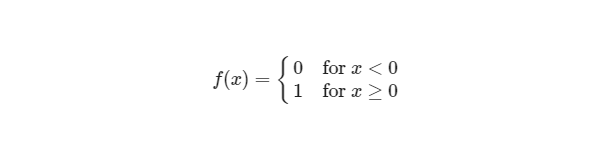

In [2]:
def binary_step(x, threshold=0): 
# threshold가 있는 함수를 쓰면 꼭 defualt 값을 설정해주세요
    return 0 if x<threshold else 1

In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def plot_and_visulize(image_url, function, derivative=False):
    X = [-10 + x/100 for x in range(2000)]
    y = [function(y) for y in X]
    
    plt.figure(figsize=(12,12))
    
    # 함수 그래프
    plt.subplot(3,2,1)
    plt.title('function')
    plt.plot(X,y)
    
    # 함수의 미분 그래프
    plt.subplot(3,2,2)
    plt.title('derivative')
    if derivative:
        dev_y = [derivative(y) for y in X]
        plt.plot(X,dev_y)
    
    # 무작위 샘플들 분포
    samples = np.random.rand(1000)
    samples -= np.mean(samples)
    plt.subplot(3,2,3)
    plt.title('samples')
    plt.hist(samples,100)
    
    # 활성화 함수를 통과한 샘플들 분포
    act_values = [function(y) for y in samples]
    plt.subplot(3,2,4)
    plt.title('activation values')
    plt.hist(act_values,100)
    
    # 원본 이미지
    image = np.array(Image.open(image_url), dtype=np.float64)[:,:,0]/255. # 구분을 위해 gray-scale해서 확인
    image -= np.median(image)
    plt.subplot(3,2,5)
    plt.title('origin image')
    plt.imshow(image, cmap='gray')
    
    # 활성화 함수를 통과한 이미지
    activation_image = np.zeros(image.shape)
    h, w = image.shape
    for i in range(w):
        for j in range(h):
            activation_image[j][i] += function(image[j][i])
    plt.subplot(3,2,6)
    plt.title('activation results')
    plt.imshow(activation_image, cmap='gray')
    
    return plt

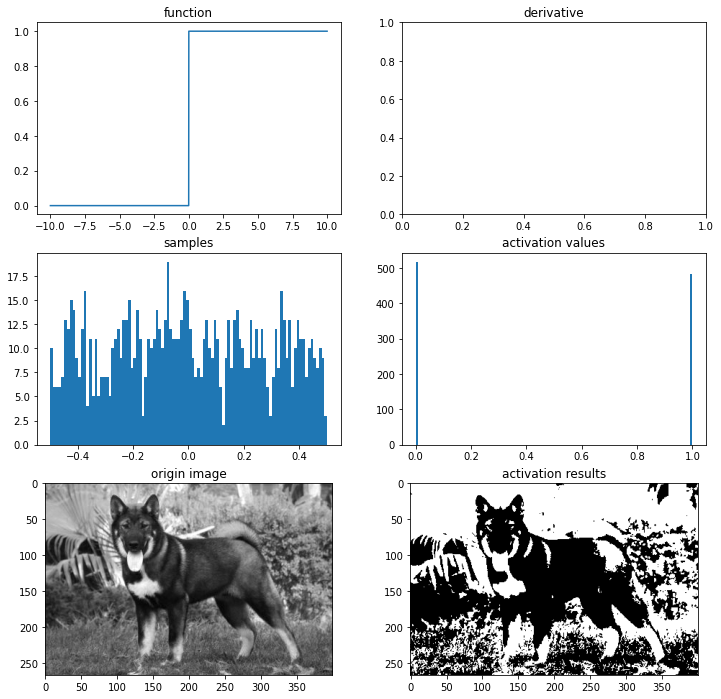

In [4]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'
ax = plot_and_visulize(img_path, binary_step)
ax.show()

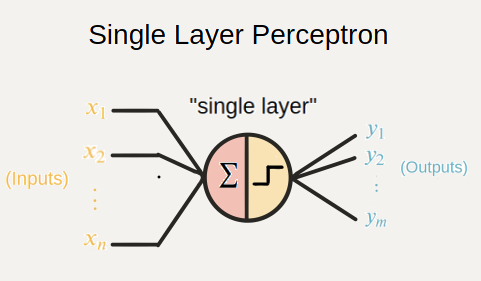

In [5]:
# 퍼셉트론
class Perceptron(object):
    def __init__(self, input_size, activation_ftn, threshold=0, learning_rate=0.01):
        self.weights = np.random.randn(input_size)
        self.bias = np.random.randn(1)
        self.activation_ftn = np.vectorize(activation_ftn)
        self.learning_rate = learning_rate
        self.threshold = threshold

    def train(self, training_inputs, labels, epochs=100, verbose=1):
        '''
        verbose : 1-매 에포크 결과 출력, 
                  0-마지막 결과만 출력 
        '''
        for epoch in range(epochs):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.__call__(inputs)
                self.weights += self.learning_rate * (label - prediction) * inputs
                self.bias += self.learning_rate * (label - prediction)
            if verbose == 1:
                pred = self.__call__(training_inputs)
                accuracy = np.sum(pred==labels)/len(pred)
                print(f'{epoch}th epoch, accuracy : {accuracy}')
        if verbose == 0:
            pred = self.__call__(training_inputs)
            accuracy = np.sum(pred==labels)/len(pred)
            print(f'{epoch}th epoch, accuracy : {accuracy}')
    
    def get_weights(self):
        return self.weights, self.bias
                
    def __call__(self, inputs):
        summation = np.dot(inputs, self.weights) + self.bias
        return self.activation_ftn(summation, self.threshold)

In [6]:
def scatter_plot(plt, X, y, threshold = 0, three_d=False):
    ax = plt
    if not three_d:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], s = area1*10, label='True')
        ax.scatter(X[:,0], X[:,1], s = area2*10, label='False')
        ax.legend()
    else:
        area1 = np.ma.masked_where(y <= threshold, y)
        area2 = np.ma.masked_where(y > threshold, y+1)
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area1, label='True')
        ax.scatter(X[:,0], X[:,1], y-threshold, s = area2, label='False')
        ax.scatter(X[:,0], X[:,1], 0, s = 0.05, label='zero', c='gray')
        ax.legend()
    return ax

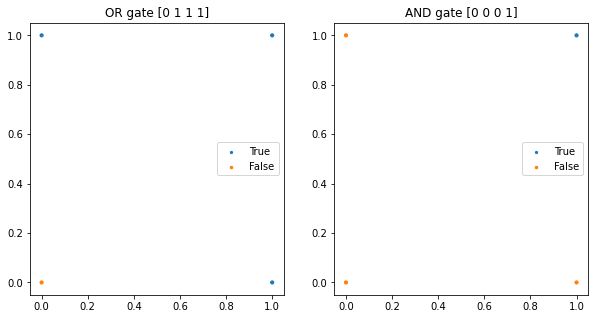

In [7]:
# AND gate, OR gate
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

이진 계단 함수의 임계점이 0이라고 하면 위의 gate들은 다음과 같이 단층 퍼셉트론으로 구현할 수 있습니다.

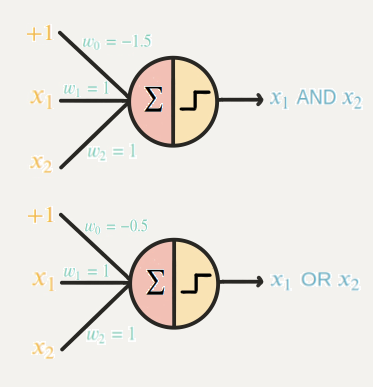

In [8]:
# OR gate
or_p = Perceptron(input_size=2, activation_ftn=binary_step)
or_p.train(X, or_y, epochs=1000, verbose=0)
print(or_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

# AND gate
and_p = Perceptron(input_size=2, activation_ftn=binary_step)
and_p.train(X, and_y, epochs=1000, verbose=0)
print(and_p.get_weights()) # 가중치와 편향값은 훈련마다 달라질 수 있습니다.

999th epoch, accuracy : 1.0
(array([0.27692595, 0.09168723]), array([-0.08041699]))
999th epoch, accuracy : 1.0
(array([1.31550794, 0.34595172]), array([-1.32153156]))


OR gate와 AND gate 를 구현한 단층 퍼셉트론 모델의 accuracy가 1.0을 기록하고 있습니다. 이 정도면 단층 퍼셉트론으로 OR gate와 AND gate 를 충분히 구현해 낼 수 있음을 확인할 수 있겠습니다.

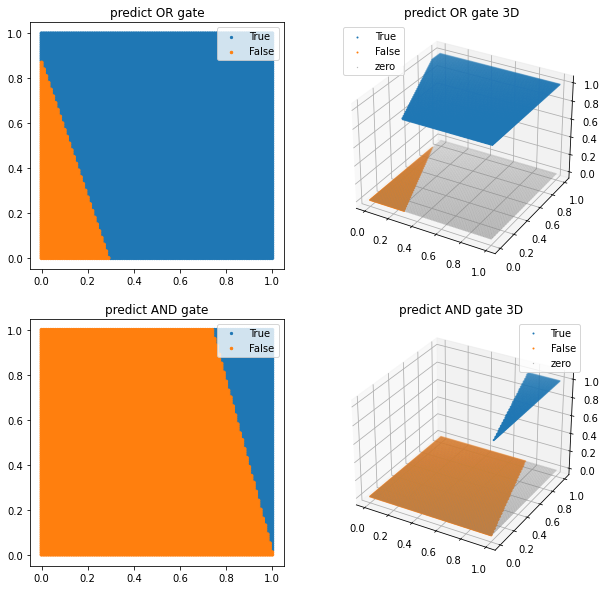

In [9]:
from itertools import product

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_p(test_X)
pred_and_y = and_p(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, three_d=True)

plt.show()

어떻습니까? 당초 예상했던 것과 그래프의 모양이 다소 다르게 나오나요? 이미 눈치채셨겠지만, 이 그래프의 모양은 단층 퍼셉트론을 훈련(train)할 때마다 다르게 그려질 것입니다. OR gate와 AND gate의 accuracy를 1.0으로 만드는 퍼셉트론의 최적 가중치 값은 하나로 정해져 있지 않으므로, 따라서 이 가중치에 의해 결정되는 그래프의 모양도 계속 달라집니다. 그러나 중요한 것은 퍼셉트론의 가중치가 결정짓는 경계선을 기준으로 `[[0,0], [1,0], [0,1], [1,1]]` 이상 4개의 점에서의 OR gate, AND gate의 진릿값이 정확한가 하는 것입니다.

### 이진 계단 함수의 한계1
- XOR gate도 구현 가능?

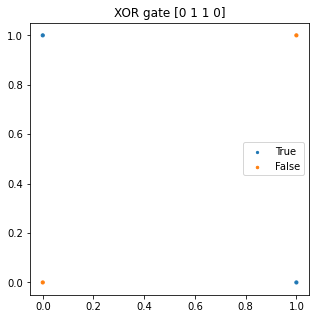

In [10]:
# XOR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(5,5))
xor_y = np.array([x1 ^ x2 for x1,x2 in X])
plt.title('XOR gate '+ str(xor_y))
plt = scatter_plot(plt, X, xor_y)
plt.show()

999th epoch, accuracy : 0.5
(array([-0.00162457, -0.00619756]), array([0.00236129]))


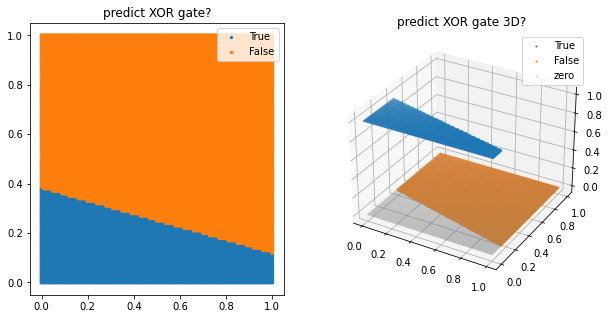

In [11]:
# XOR gate가 풀릴까?
xor_p = Perceptron(input_size=2, activation_ftn=binary_step, threshold=threshold)
xor_p.train(X, xor_y, epochs=1000, verbose=0)
print(xor_p.get_weights())

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_p(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate?')
ax1 = scatter_plot(ax1, test_X, pred_xor_y)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D?')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, three_d=True)

plt.show()

어떤가요? 이번에 나온 accuracy는 무려.... 0.25밖에 안됩니다. 왜 그럴까요?

단층 퍼셉트론은 이 XOR gate를 구현할 수 없습니다. 왜냐하면 XOR gate의 진릿값 그래프를 하나의 선으로 구분을 할 수 없기 때문입니다. 하지만 이를 해결할 수 있는 방법이 있습니다. 바로 여러 층을 쌓는 것입니다. 이렇게 여러 층을 쌓은 모델을 <mark>다층 퍼셉트론(multi-layer perceptron, MLP)</mark> 이라고 합니다.

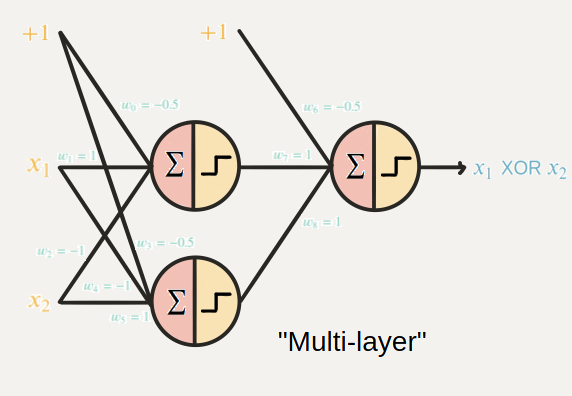

### 이진 계단 함수의 한계 2

이처럼 층만 쌓으면 이진 계단 함수를 사용한 모델은 비선형적 데이터도 예측할 수 있습니다. 하지만 이진 계단 함수는 몇 가지 큰 단점이 있습니다.

바로 역전파 알고리즘(backpropagation algorithm)을 사용하지 못하는 것입니다. 이진 계단 함수는 0에서는 미분이 안 될뿐더러 0인 부분을 제외하고 미분을 한다고 해도 미분 값이 전부 0이 나옵니다. 때문에 역전파에서 가중치들이 업데이트되지 않습니다.

현실의 대부분 문제들에서 다층 인공신경망을 사용하고 있고 이런 인공신경망을 훈련시킬 때 역전파 알고리즘을 사용하고 있습니다. 이진 계단 함수를 사용한다면 역전파 알고리즘을 사용하지 못하기 때문에 상대적으로 비효율적인 업데이트 방법을 사용해야 합니다. 즉, 현실의 복잡한 문제는 사실상 해결하기 어렵다는 것이죠.

또한 다중 출력은 할 수 없다는 단점이 있습니다. 이진 계단 함수는 출력을 1 또는 0으로 밖에 주지 못하기 때문에 다양한 클래스를 구분해야 하는 문제는 해결할 수 없습니다.

이진 계단 함수는 정말 초기의 퍼셉트론에서 쓰이던 것으로 이런 것이 있었구나 정도만 알고 넘어가면 좋을 것 같습니다.

---

## 26.8 활성화 함수의 종류 (2) 선형 활성화 함수

### 선형 활성화 함수
- 말 그래도 '선형'인 활성화 함수입니다.
- 선형 활성화 함수를 사용한 모델은 이진 계단 함수를 사용한 모델과 다르게 다중 출력이 가능합니다. 때문에 이진 분류는 물론이고 간단한 다중 분류 문제까지도 해결할 수 있습니다.
- 또한 미분이 가능해서 역전파 알고리즘 또한 사용할 수 있습니다.

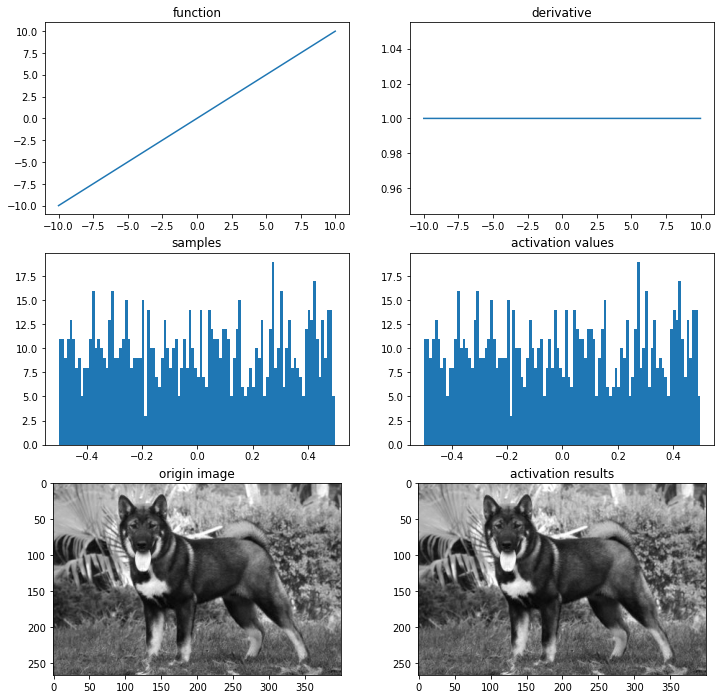

In [12]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 선형 함수
def linear(x):
    return x

def dev_linear(x):
    return 1

# 시각화
ax = plot_and_visulize(img_path, linear, dev_linear)
ax.show()

- 선형 활성화 함수의 치역은 실수 전체

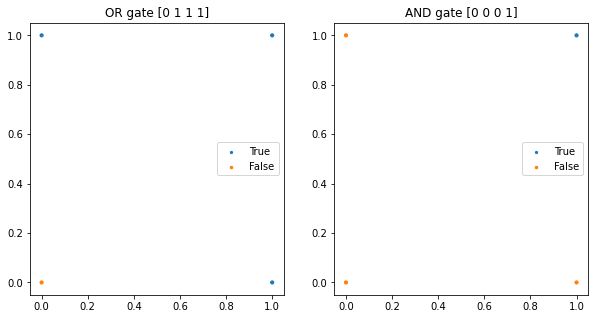

In [13]:
# AND gate, OR gate
threshold = 0
X = np.array([[0,0], [1,0], [0,1], [1,1]])

plt.figure(figsize=(10,5))
# OR gate
or_y = np.array([x1 | x2 for x1,x2 in X])
ax1 = plt.subplot(1,2,1)
ax1.set_title('OR gate ' + str(or_y))
ax1 = scatter_plot(ax1, X, or_y)

# AND gate
and_y = np.array([x1 & x2 for x1,x2 in X])
ax2 = plt.subplot(1,2,2)
ax2.set_title('AND gate ' + str(and_y))
ax2 = scatter_plot(ax2, X, and_y)

plt.show()

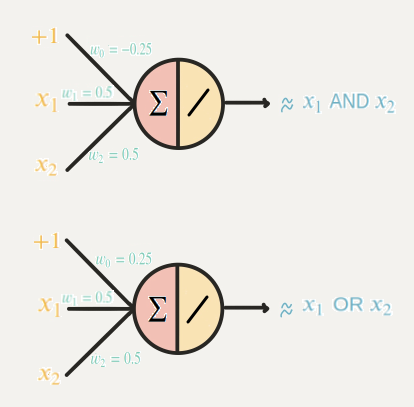

In [14]:
import tensorflow as tf

# OR gate model
or_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
or_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_linear_model.summary()

# AND gate model
and_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
and_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_linear_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [15]:
or_linear_model.fit(X, or_y, epochs=1000, verbose=0)
and_linear_model.fit(X, and_y, epochs=1000, verbose=0)
print('done')

done


/opt/conda/lib/python3.9/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


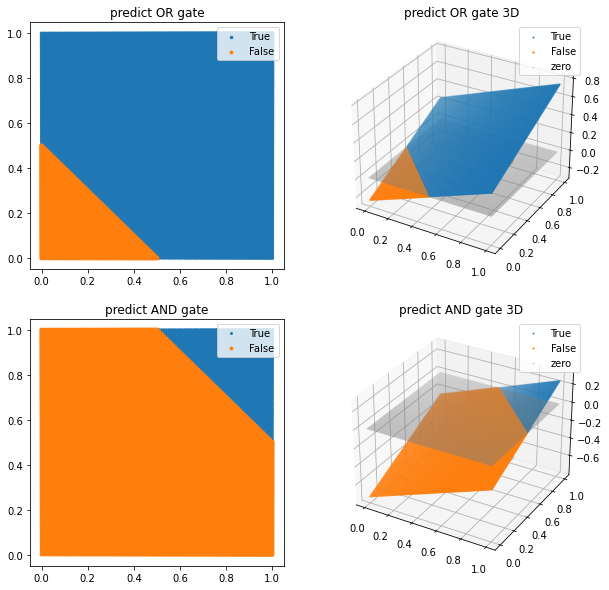

In [16]:
# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_linear_model(test_X)
pred_and_y = and_linear_model(test_X)

plt.figure(figsize=(10,10))
ax1 = plt.subplot(2,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(2,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(2,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(2,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

plt.show()

-  이 모델로 XOR gate를 구현할 수 있을까요? 정답은 '불가능하다' 입니다.

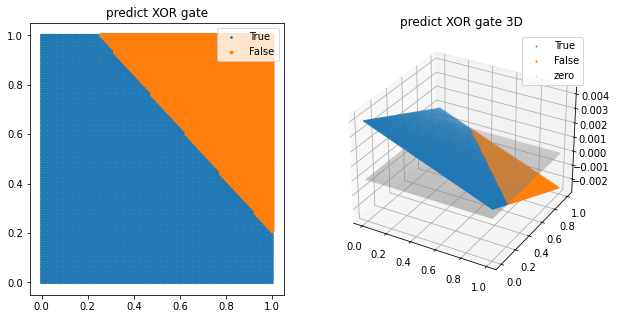

In [17]:
# XOR gate
xor_linear_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,), dtype='float64'),
    tf.keras.layers.Dense(1, activation='linear')
])
xor_linear_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_linear_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_xor_y = xor_linear_model(test_X)

plt.figure(figsize=(10,5))
ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

- 마찬가지로 선 하나로는 나눌 수 없기 때문입니다.

위에서도 다루었듯이 선형 활성화 함수를 사용하면 아무리 층을 쌓아도 결국 하나의 노드를 쓰는 것과 같습니다. 따라서 층을 쌓는다고 해서 크게 달라지는 것이 없습니다

---

## 26.9 활성화 함수의 종류 (3) 비선형 활성화 함수-시그모이드, Softmax
비선형 활성화 함수(non-linear activation function)는 '비선형'인 활성화 함수로써 앞에서 나왔던 활성화 함수들의 문제점을 해결한 함수입니다. 따라서 비선형 활성화 함수를 사용한 모델은 역전파 알고리즘을 사용할 수 있으며, 다중 출력도 가능하고 비선형적 특성을 지닌 데이터도 예측할 수 있습니다.

### 시그모이드/로지스틱

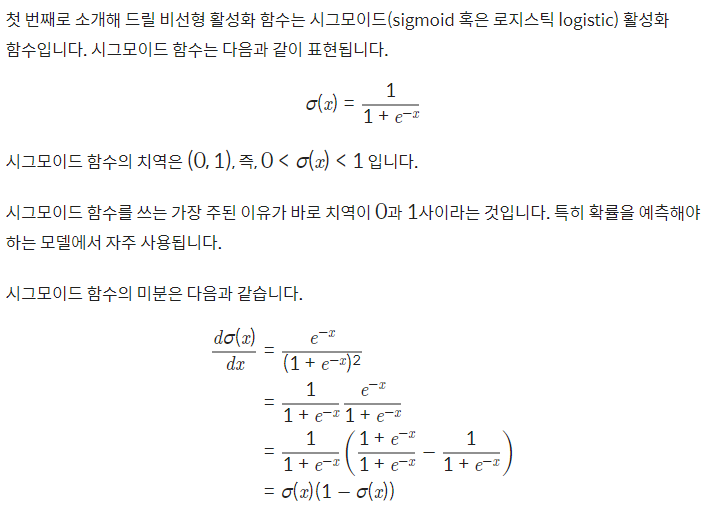

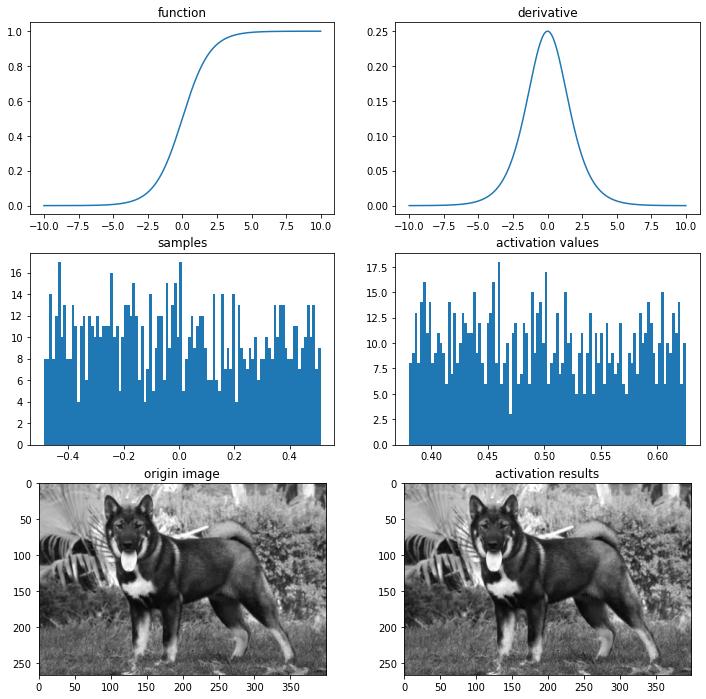

In [18]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 시그모이드 함수
def sigmoid(x):
    return 1/(1+np.exp(-x).astype(np.float64))

def dev_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

# 시각화
ax = plot_and_visulize(img_path, sigmoid, dev_sigmoid)
ax.show()

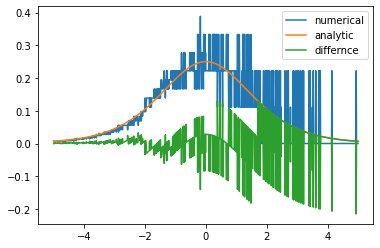

In [19]:
# 수치 미분
def num_derivative(x, function):
    h = 1e-15 # 이 값을 바꾸어 가며 그래프를 확인해 보세요
    numerator = function(x+h)-function(x)
    return numerator/h

# 두 그래프의 차이
diff_X = [-5+x/100 for x in range(1001)]
dev_y = np.array([dev_sigmoid(x) for x in diff_X])
num_dev_y = np.array([num_derivative(x, sigmoid) for x in diff_X])

diff_y = dev_y - num_dev_y
plt.plot(diff_X, num_dev_y, label='numerical')
plt.plot(diff_X, dev_y, label='analytic')
plt.plot(diff_X, diff_y, label='differnce')
plt.legend()

plt.show()

### 시그모이드 함수의 단점

시그모이드 함수는 0 또는 1에서 포화(saturate) 됩니다. 이 말은 입력값이 아무리 커져도 함수의 출력은 1에 더 가까워져 갈 뿐 1 이상으로 높아 않고, 입력값이 아무리 작아져도 함수의 출력은 0에 더 가까워져 갈 뿐 0 이하로 떨어지지 않는다는 의미입니다. 이렇게 포화가 되면 발생하는 일이 바로 그래디언트가 0과 아주 가까워지는 것입니다. 역전파에서 이 0과 가까워진 그래디언트는 앞에서 온 역전파 값에 곱해지게 되는데 그렇게 되면 그 이후로 전파되는 모든 역전파 값이 0에 근접하게 되어 사실상 가중치 업데이트가 일어나지 않게 됩니다. 이것을 '그래디언트를 죽인다(kill the gradient)' 라고 표현합니다. 극단적인 예로 만약 어떤 모델의 초기 가중치 값들을 아주 크게 잡아 포화상태를 만들면 역전파 때 그래디언트가 죽기 때문에 아무리 많이 에포크를 돌려도 훈련이 거의 되지 않습니다.

### 비선형 활성화 함수를 사용해 AND gate, OR gate, XOR gate 구현

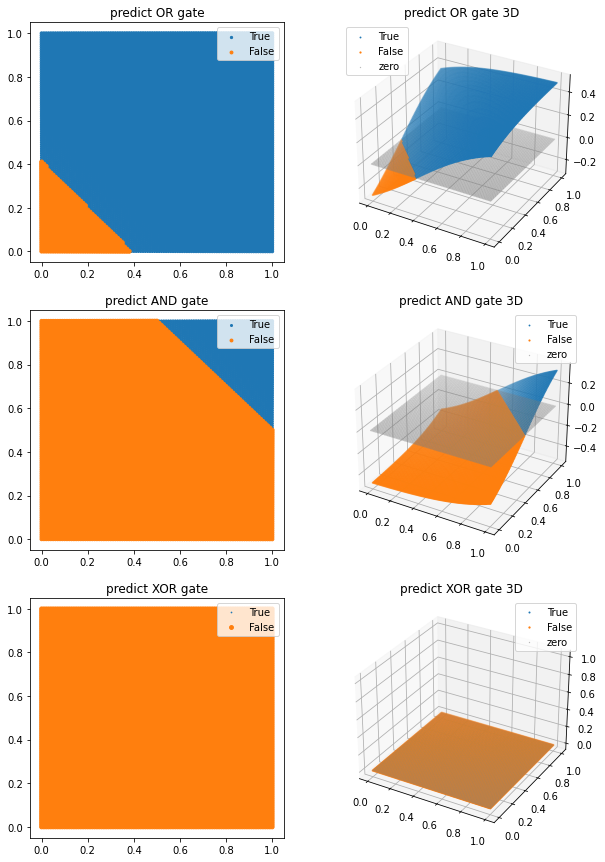

In [20]:
# OR gate
or_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
or_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
or_sigmoid_model.fit(X, or_y, epochs=1000, verbose=0)

# AND gate
and_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
and_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
and_sigmoid_model.fit(X, and_y, epochs=1000, verbose=0)

# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

# 그래프로 그려보기
test_X = np.array([[x/100,y/100] for (x,y) in product(range(101),range(101))])
pred_or_y = or_sigmoid_model(test_X)
pred_and_y = and_sigmoid_model(test_X)
pred_xor_y = xor_sigmoid_model(test_X)

plt.figure(figsize=(10,15))
ax1 = plt.subplot(3,2,1)
ax1.set_title('predict OR gate')
ax1 = scatter_plot(ax1, test_X, pred_or_y, threshold=0.5)

ax2 = plt.subplot(3,2,2, projection='3d')
ax2.set_title('predict OR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_or_y, threshold=0.5, three_d=True)

ax3 = plt.subplot(3,2,3)
ax3.set_title('predict AND gate')
ax3 = scatter_plot(ax3, test_X, pred_and_y, threshold=0.5)

ax4 = plt.subplot(3,2,4, projection='3d')
ax4.set_title('predict AND gate 3D')
ax4 = scatter_plot(ax4, test_X, pred_and_y, threshold=0.5, three_d=True)

ax5 = plt.subplot(3,2,5)
ax5.set_title('predict XOR gate')
ax5 = scatter_plot(ax5, test_X, pred_xor_y, threshold=0.5)

ax6 = plt.subplot(3,2,6, projection='3d')
ax6.set_title('predict XOR gate 3D')
ax6 = scatter_plot(ax6, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

XOR gate는 제대로 구현하지 못한 것을 확인할 수 있습니다. 하지만 이것이 비선형 함수들도 XOR gate를 구현하지 못한다는 것은 아닙니다. 다만, 좀 더 특수한 비선형 함수가 필요합니다.

2차 다항식(quadratic polynomial)을 추가한 시그모이드 함수를 사용한다면 XOR gate를 구현할 수 있습니다.

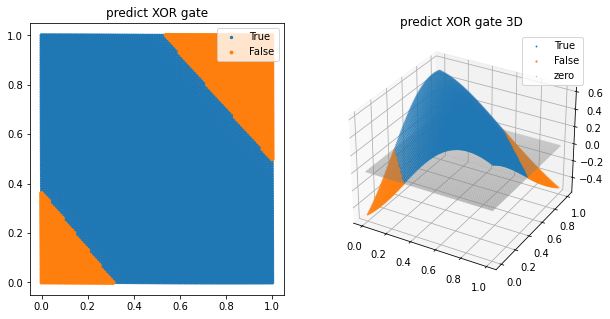

In [21]:
# 레이어를 추가했을 때
# XOR gate
xor_sigmoid_model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(2,)),
    tf.keras.layers.Dense(2, activation='sigmoid'), # 2 nodes로 변경
    tf.keras.layers.Dense(1)
])
xor_sigmoid_model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), metrics=['accuracy'])
xor_sigmoid_model.fit(X, xor_y, epochs=1000, verbose=0)

plt.figure(figsize=(10,5))
pred_xor_y = xor_sigmoid_model(test_X)

ax1 = plt.subplot(1,2,1)
ax1.set_title('predict XOR gate')
ax1 = scatter_plot(ax1, test_X, pred_xor_y, threshold=0.5)

ax2 = plt.subplot(1,2,2, projection='3d')
ax2.set_title('predict XOR gate 3D')
ax2 = scatter_plot(ax2, test_X, pred_xor_y, threshold=0.5, three_d=True)

plt.show()

### softmax란?
Softmax는 여러분들이 강아지와 고양이 사진을 구분하는 분류 문제에서 가장 많이 접한 함수이죠? 시그모이드는 Binary Classification, 즉 참(11) or 거짓(00) 등 2가지 class를 분류할 때 많이 쓰입니다. 왜냐하면 시그모이드는 00 과 11 사이의 출력값을 가지고 있기 때문이죠.

한편, Softmax는 10가지, 100가지 class 등 class의 수에 제한 없이 "각 class의 확률"을 구할 때 쓰입니다. 예컨대, 가위, 바위, 보 사진 분류 문제는 3개 class 분류 문제이고, softmax는 각 class의 확률값, 즉 (0.2, 0.5, 0.3)(0.2,0.5,0.3) 이렇게 출력값을 줍니다. Softmax의 가장 큰 특징은, 확률의 성질인 모든 경우의 수(=모든 class)의 확률을 더하면 11이 되는 성질을 가지고 있습니다. 그래서 Softmax는 모델의 마지막 layer에서 활용이 됩니다.

---

## 26.10 활성화 함수의 종류 (4) 비선형 활성화 함수-하이퍼볼릭 탄젠트

### 하이퍼볼릭 탄젠트
- 쌍곡선 함수 중 하나

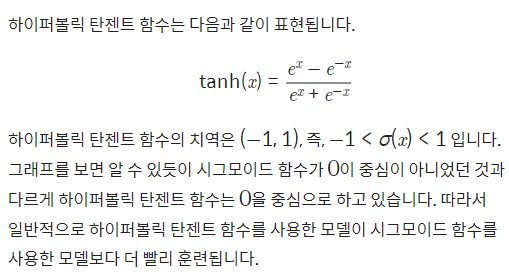

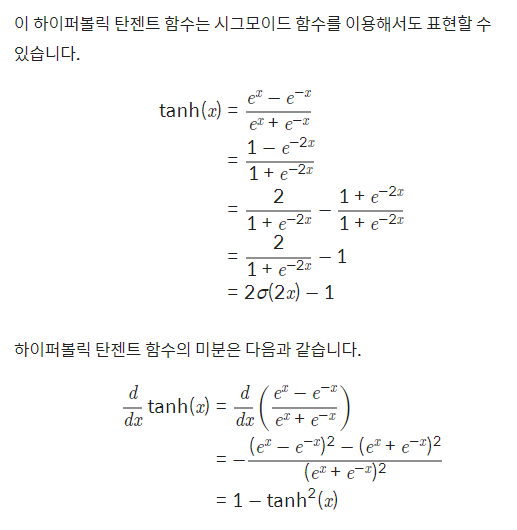

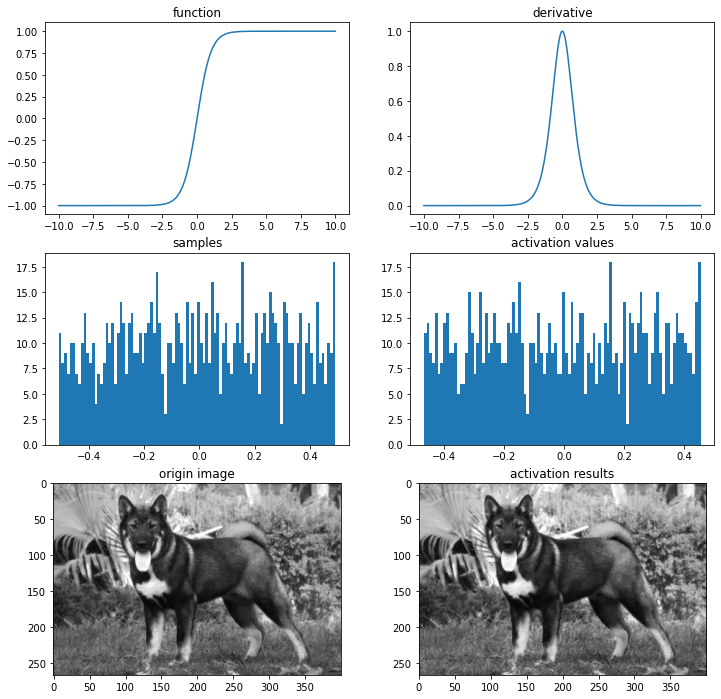

In [22]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# 하이퍼볼릭 탄젠트 함수
def tanh(x):
    return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))

def dev_tanh(x):
    return 1-tanh(x)**2

# 시각화
ax = plot_and_visulize(img_path, tanh, dev_tanh)
ax.show()

### 하이퍼볼릭 탄젠트 함수의 단점
- 하이퍼볼릭 탄젠트 함수는 그래프에서도 알 수 있듯 -1 또는 1에서 포화됩니다

---

## 26.11 활성화 함수의 종류 (5) 비선형 활성화 함수-ReLU

### ReLU

ReLU(rectified linear unit) 함수는 최근 가장 많이 사용되고 있는 활성화 함수입니다. ReLU의 식은 다음과 같습니다.

$$f(x) = max(0,x)$$


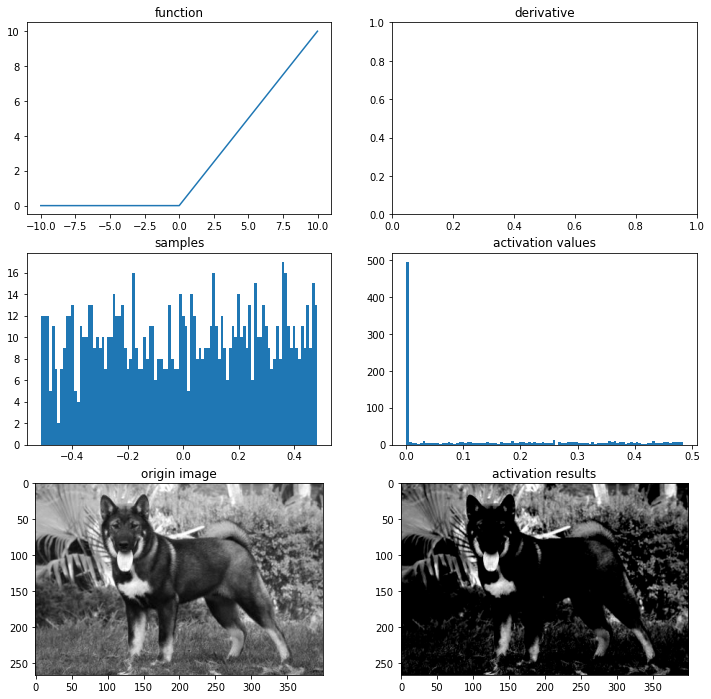

In [23]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# relu 함수
def relu(x):
    return max(0,x)

# 시각화
ax = plot_and_visulize(img_path, relu)
ax.show()

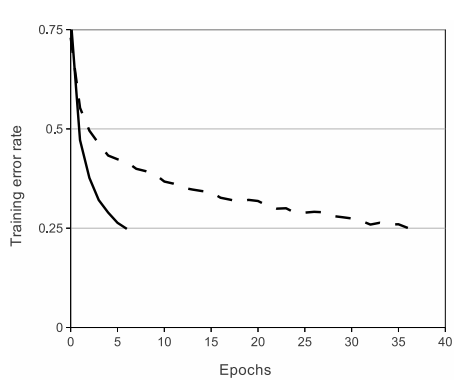

ReLU함수의 치역은 [0, $\infty$)입니다. ReLU를 사용한 모델은 하이퍼볼릭 탄젠트를 사용한 모델보다 몇 배 더 빠르게 훈련이 됩니다. 이는 위의 그래프를 통해서 확인할 수 있습니다.

위 그래프는 에포크당 훈련 에러 비율을 나타내고 있습니다. 실선이 ReLU 함수를 사용한 모델의 에러 비율이고, 점선이 하이퍼볼릭 탄젠트 함수를 사용한 모델의 에러 비율입니다. ReLU를 사용한 모델이 약 7배 정도 빠르게 에러 비율이 감소한 것을 볼 수 있습니다. 또한 ReLU 함수는 시그모이드나 하이퍼볼릭 탄젠트처럼 비용이 높은 (예를 들면, exponential와 같은) 연산을 사용하지 않기 때문에 처리 속도가 빠릅니다.

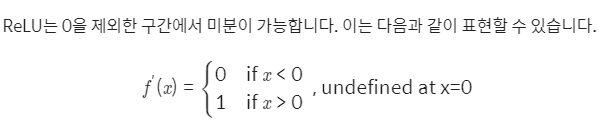

즉, x=0x=0일 때 ReLU 함수의 우미분과 좌미분이 다르므로, ReLU함수는 x=0x=0에서 미분이 불가능합니다. 그렇다면 만약 실제 문제를 풀 때 ReLU 함수의 그래디언트를 구하는 과정에서 00값이 주어지면 어떻게 처리될까요? 그러한 상황에선 일반적으로 무작위하게 00 또는 11을 출력합니다.

### ReLU 함수를 이용한 모델은 비선형적 데이터의 특징을 잘 잡아낼까?

과연 ReLU 함수로 $f(x) = x^2$
 와 같은 함수를 표현할 수 있을까요? 정답은 '표현 할 수 있다' 입니다. 이것을 수학적으로 증명한 논문이 있습니다. 하지만 이해하기 위해서 필요한 수학 지식이 너무 많기 때문에 여기서는 실험을 통해 확인만 해보겠습니다.

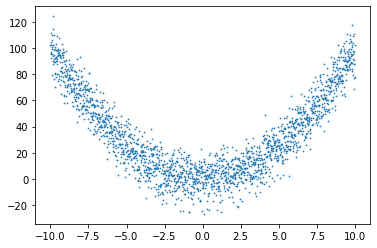

In [24]:
q_X = np.array([-10+x/100 for x in range(2001)])
q_y = np.array([(x)**2 + np.random.randn(1)*10 for x in q_X])
plt.scatter(q_X, q_y, s=0.5)

In [25]:
approx_relu_model_p = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(6, activation='relu'), # 6 nodes 병렬 연결
    tf.keras.layers.Dense(1)
])
approx_relu_model_p.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_p.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_s = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(2, activation='relu'),# 2 nodes 직렬로 3번 연결
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])
approx_relu_model_s.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.005), metrics=['accuracy'])
approx_relu_model_s.fit(q_X, q_y, batch_size=32, epochs=100, verbose=0)

approx_relu_model_p.summary()
approx_relu_model_s.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 6)                 12        
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 7         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2)                 4         
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 6         
____________________________________

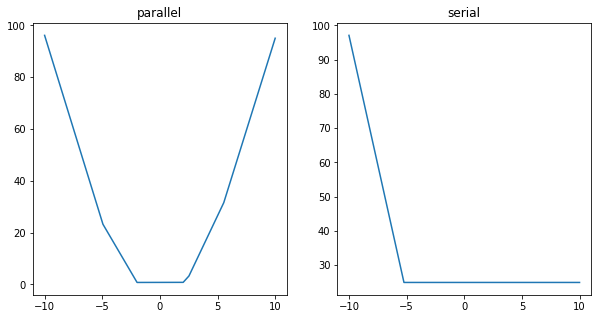

In [26]:
q_test_X = q_X.reshape((*q_X.shape,1))
plt.figure(figsize=(10,5))

ax1 = plt.subplot(1,2,1)
ax1.set_title('parallel')
pred_y_p = approx_relu_model_p(q_test_X)
ax1.plot(q_X, pred_y_p)

ax2 = plt.subplot(1,2,2)
ax2.set_title('serial')
pred_y_s = approx_relu_model_s(q_test_X)
ax2.plot(q_X, pred_y_s)

plt.show()

실제로 $x^2$의 그래프를 근사할 수 있는지 확인해 봄과 동시에 노드를 병렬로 쌓는 것과 직렬로 쌓는 것 중에 어느 것이 더 좋은지도 비교해 보았습니다. 이 결과로 우리는 ReLU함수를 사용해도 충분히 $x^2$와 같은 비선형적 데이터를 예측해낼 수 있다는 것을 알 수 있었고, 파라미터 수가 같음에도 불구하고 노드를 병렬로 쌓은 것이 직렬로 쌓은 것보다 더 좋은 결과를 낸 것을 확인할 수 있었습니다.

### ReLU 함수의 단점

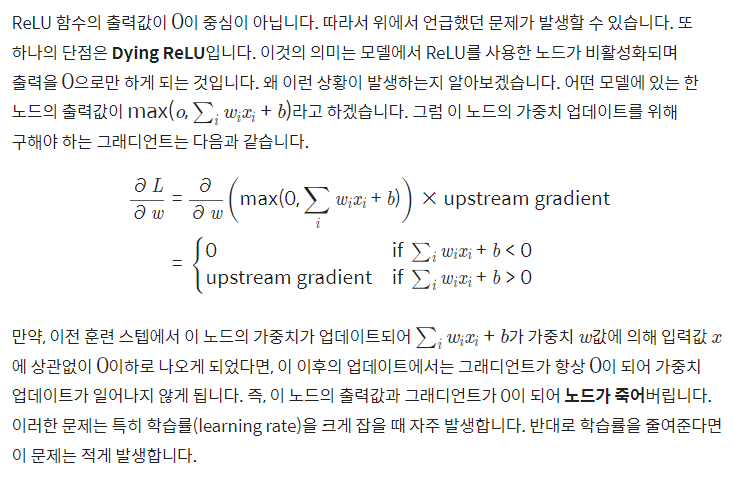

---

## 26.12 활성화 함수의 종류 (6) 비선형 활성화 함수-ReLU의 단점을 극복하기 위한 시도들

### Leaky ReLU
- Leaky ReLU함수는 ReLU 함수의 'Dying ReLU'를 해결하기 위한 시도 중 하나입니다. 식을 먼저 보겠습니다.
$$f(x) = max(0.01x,x)$$

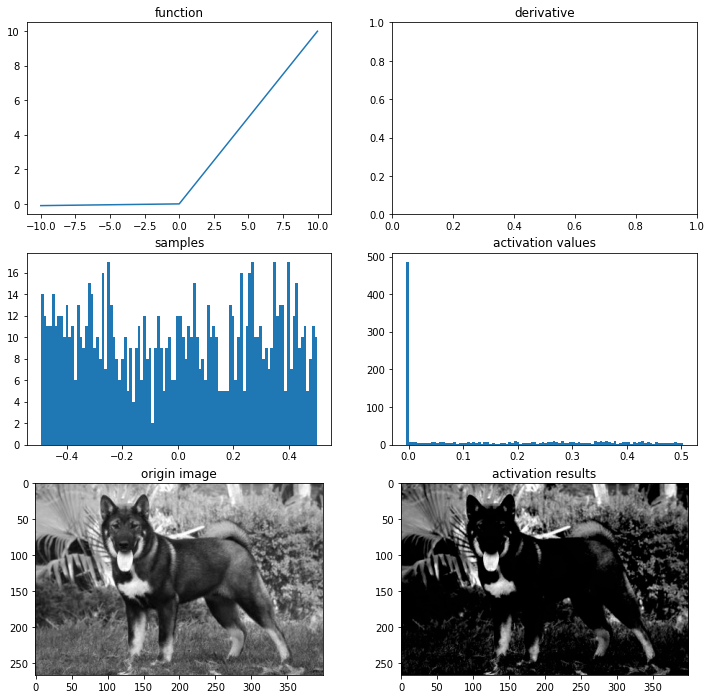

In [27]:
import os
img_path = os.getenv('HOME')+'/aiffel/activation/jindo_dog.jpg'

# leaky relu 함수
def leaky_relu(x):
    return max(0.01*x,x)

# 시각화
ax = plot_and_visulize(img_path, leaky_relu)
ax.show()

'Dying ReLU'를 발생시켰던 0을 출력하던 부분을 아주 작은 음수값을 출력하게 만들어 주어 해당 문제를 해결하였습니다.

### PReLU
- PReLU(parametric ReLU) 는 Leaky ReLU와 유사하지만 새로운 파라미터를 추가하여 0 미만일 때의 '기울기'가 훈련되게 했습니다. 식으로 표현하면 다음과 같습니다.
$$f(x) = max(\alpha x, x)$$

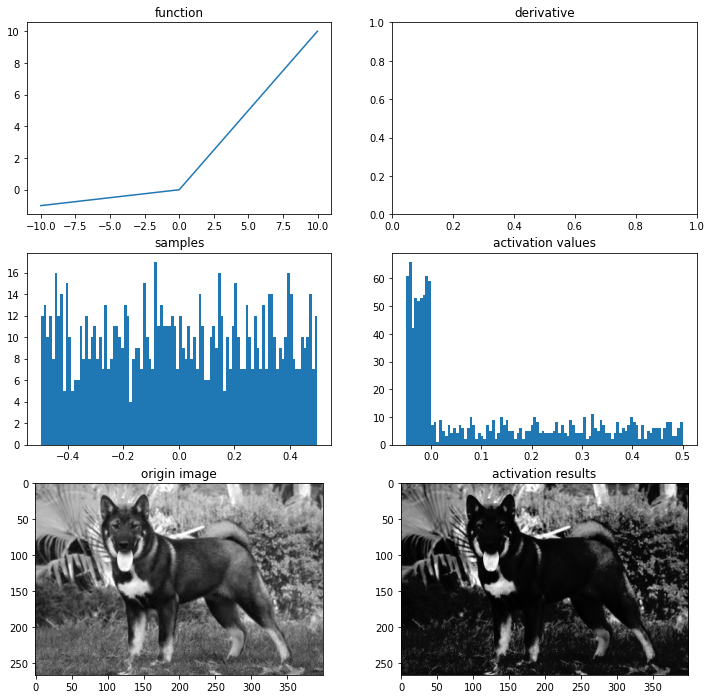

In [28]:
# PReLU 함수
def prelu(x, alpha):
    return max(alpha*x,x)

# 시각화
ax = plot_and_visulize(img_path, lambda x: prelu(x, 0.1)) # parameter alpha=0.1일 때

ax.show()

### ELU
- ELU(exponential linear unit)은 ReLU의 모든 장점을 포함하며, 0이 중심점이 아니었던 단점과, 'Dying ReLU'문제를 해결한 활성화 함수입니다. 식은 다음과 같습니다.
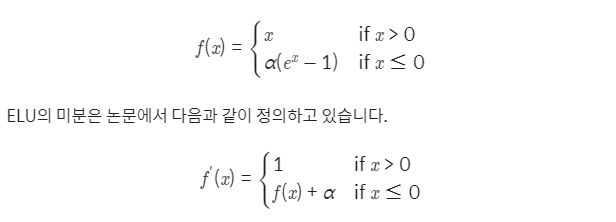

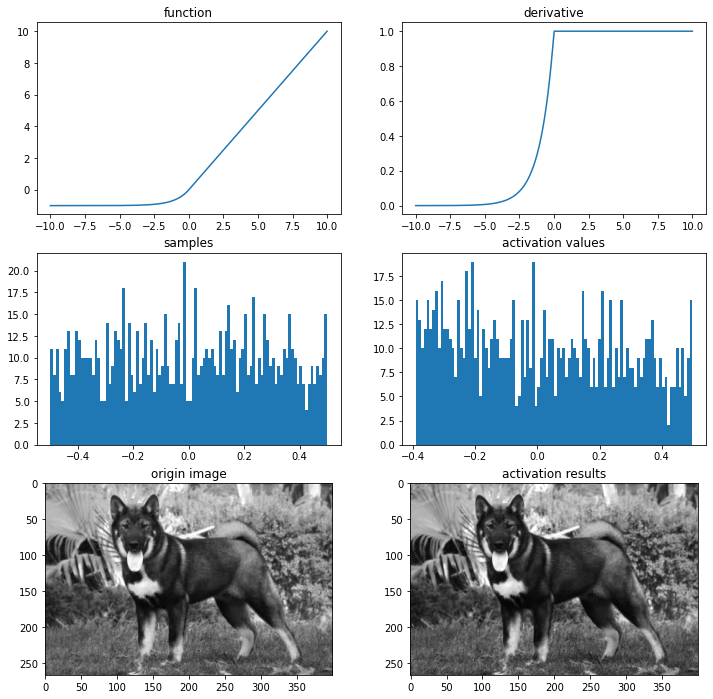

In [29]:
# elu 함수
def elu(x, alpha):
    return x if x > 0 else alpha*(np.exp(x)-1)

def dev_elu(x, alpha):
    return 1 if x > 0 else elu(x, alpha) + alpha

# 시각화
ax = plot_and_visulize(img_path, lambda x: elu(x, 1), lambda x: dev_elu(x, 1)) # alpha가 1일 때
ax.show()

이 함수의 단점은 exponential 연산이 들어가서 계산 비용이 높아졌다는 점이 있습니다.